In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
df_train = pd.read_csv("/content/sample_data/california_housing_train.csv")
print(df_train.shape[0])
display(df_train.head(5))

17000


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [3]:
import pandas as pd
df_test = pd.read_csv("/content/sample_data/california_housing_test.csv")
print(df_test.shape[0])
display(df_test.head(5))

3000


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


- So `median_house_value` is the target variable, rest are features.
- All features are unbound numerical(continuous) features, hence should be dealt with by standardization.
- Longitude limits: -180 to 180, latitude limits: -90 to 90, hence can be MinMax scaled.


In [4]:
def latitude_scaler(lat_val):
  return (lat_val+90)/180

def longitude_scaler(long_val):
  return (long_val+180)/360

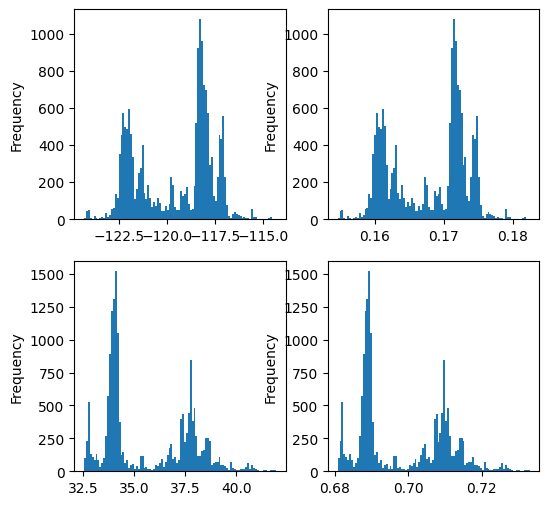

In [5]:
fig, ax = plt.subplots(2, 2, figsize=(6, 6))

df_train['longitude_scaled'] = longitude_scaler(df_train['longitude'])
df_train['latitude_scaled'] = latitude_scaler(df_train['latitude'])

df_test['longitude_scaled'] = longitude_scaler(df_test['longitude'])
df_test['latitude_scaled'] = latitude_scaler(df_test['latitude'])

df_train['longitude'].plot.hist(bins=100, ax=ax[0][0]);df_train['longitude_scaled'].plot.hist(bins=100, ax=ax[0][1])
df_train['latitude'].plot.hist(bins=100, ax=ax[1][0]);df_train['latitude_scaled'].plot.hist(bins=100, ax=ax[1][1])
plt.show()

In [ ]:
df_train['housing_median_age'].agg(['min', 'max'])

min     1.0
max    52.0
Name: housing_median_age, dtype: float64

In [ ]:
df_test['housing_median_age'].agg(['min', 'max'])

min     1.0
max    52.0
Name: housing_median_age, dtype: float64

So, `housing_median_age` can rather use a MinMax scaler.

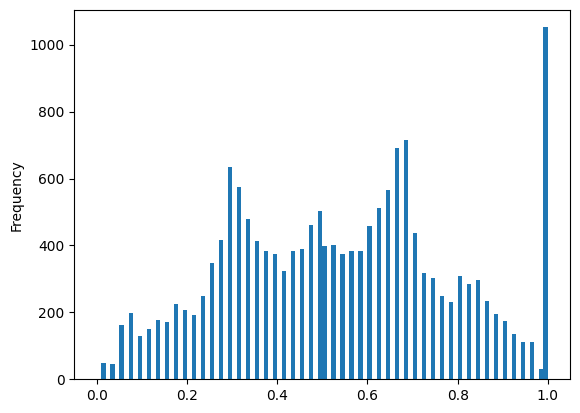

In [6]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
df_train['housing_median_age_scaled'] = mms.fit_transform(df_train[['housing_median_age']])

df_test['housing_median_age_scaled'] = mms.transform(df_test[['housing_median_age']])

df_train['housing_median_age_scaled'].plot.hist(bins=100)
plt.show()

In [7]:
features = list(df_train.columns)
cols_to_be_excluded = ['median_house_value', 'housing_median_age', 'housing_median_age_scaled', 'longitude_scaled', 'longitude', 'latitude_scaled', 'latitude']

features_to_be_normalized = [x for x in features if x not in cols_to_be_excluded]
print(features_to_be_normalized)

['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']


In [8]:
from sklearn.preprocessing import StandardScaler

for feature in features_to_be_normalized:
  normalizer = StandardScaler()
  df_train[f'{feature}_normalized'] = normalizer.fit_transform(df_train[[feature]])
  df_test[f'{feature}_normalized'] = normalizer.transform(df_test[[feature]])

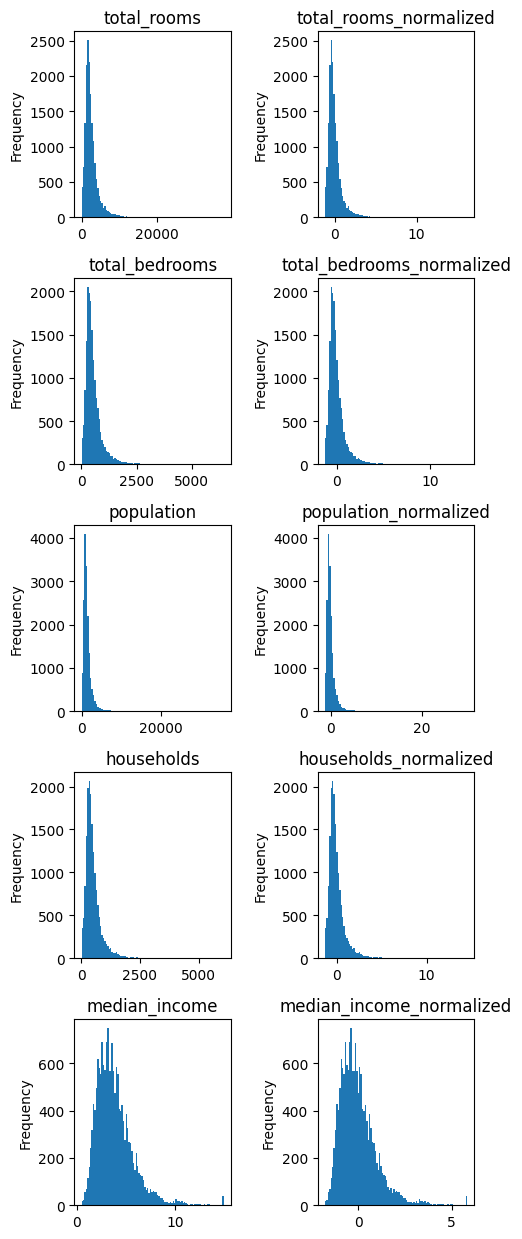

In [9]:
# plot all train features
fig, ax = plt.subplots(len(features_to_be_normalized), 2, figsize=(5, 2.5*len(features_to_be_normalized)))

for i, feature in enumerate(features_to_be_normalized):
  df_train[feature].plot.hist(bins=100, ax=ax[i][0]);ax[i][0].set_title(feature)
  df_train[f'{feature}_normalized'].plot.hist(bins=100, ax=ax[i][1]);ax[i][1].set_title(f'{feature}_normalized')

plt.tight_layout()
plt.show()

In [10]:
features_to_be_removed = features_to_be_normalized.copy()
features_to_be_removed.append('housing_median_age')
features_to_be_removed.append('latitude');features_to_be_removed.append('longitude')

df_train.drop(features_to_be_removed, axis=1, inplace=True)
display(df_train.head(3))

,median_house_value,longitude_scaled,latitude_scaled,housing_median_age_scaled,total_rooms_normalized,total_bedrooms_normalized,population_normalized,households_normalized,median_income_normalized
0,66900.0,0.182472,0.689944,0.274510,1.361695,1.764204,-0.361184,-0.075998,-1.252543
1,80100.0,0.182028,0.691111,0.352941,2.296608,3.230441,-0.261865,-0.099404,-1.081483
2,85700.0,0.181778,0.687167,0.313725,-0.882462,-0.866956,-0.955354,-0.999252,-1.170105


In [11]:
df_test.drop(features_to_be_removed, axis=1, inplace=True)
display(df_test.head(3))

,median_house_value,longitude_scaled,latitude_scaled,housing_median_age_scaled,total_rooms_normalized,total_bedrooms_normalized,population_normalized,households_normalized,median_income_normalized
0,344700.0,0.160972,0.707611,0.509804,0.569451,0.288477,0.093591,0.272498,1.428081
1,176500.0,0.171389,0.690333,0.823529,-0.520057,-0.544289,-0.540655,-0.583138,-0.149142
2,270500.0,0.172750,0.687667,0.509804,0.433663,-0.076896,0.047417,-0.016182,1.000902


In [12]:
X_train, y_train = df_train.drop(['median_house_value'], axis=1), df_train['median_house_value'].values
X_test, y_test = df_test.drop(['median_house_value'], axis=1), df_test['median_house_value'].values

In [13]:
import tensorflow as tf

reshaped_y_train = y_train.reshape(-1, 1) # Reshape using NumPy
y_train_tensor = tf.constant(reshaped_y_train) # Convert NumPy array to TensorFlow EagerTensor

reshaped_y_test = y_test.reshape(-1, 1) # Reshape using NumPy
y_test_tensor = tf.constant(reshaped_y_test) # Convert NumPy array to TensorFlow EagerTensor

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.optimizers import Adam

In [ ]:
# Create a LeakyReLU activation instance with desired configuration
leaky_relu_config = {'alpha': 0.3}  # Example configuration
leaky_relu = LeakyReLU(**leaky_relu_config)

model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(X_train.shape[-1],)))
model.add(Dense(units=16, activation='tanh'))
model.add(Dense(units=8, activation=leaky_relu))
model.add(Dense(units=1, activation='linear')) # final output layer

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 961 (3.75 KB)
Trainable params: 961 (3.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile the model
model.compile(optimizer=Adam(), loss='mean_squared_error')

# print(f"Initial loss = {model.evaluate(X, y_tensor)}\n")

# Train the model
history = model.fit(X_train, y_train_tensor, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
425/425 [==============================] - 7s 6ms/step - loss: 51262783488.0000 - val_loss: 77019127808.0000
Epoch 2/100
425/425 [==============================] - 3s 8ms/step - loss: 51230457856.0000 - val_loss: 76964306944.0000
Epoch 3/100
425/425 [==============================] - 2s 6ms/step - loss: 51175219200.0000 - val_loss: 76881584128.0000
Epoch 4/100
425/425 [==============================] - 2s 6ms/step - loss: 51098722304.0000 - val_loss: 76773679104.0000
Epoch 5/100
425/425 [==============================] - 3s 6ms/step - loss: 51003146240.0000 - val_loss: 76643459072.0000
Epoch 6/100
425/425 [==============================] - 2s 5ms/step - loss: 50890633216.0000 - val_loss: 76492660736.0000
Epoch 7/100
425/425 [==============================] - 3s 7ms/step - loss: 50762387456.0000 - val_loss: 76323143680.0000
Epoch 8/100
425/425 [==============================] - 1s 3ms/step - loss: 50619641856.0000 - val_loss: 76136161280.0000
Epoch 9/100
425/425 [===========

In [ ]:
import tensorflow as tf
print(tf.test.gpu_device_name())

physical_devices = tf.config.experimental.list_physical_devices('GPU')
print(physical_devices)

/device:GPU:0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


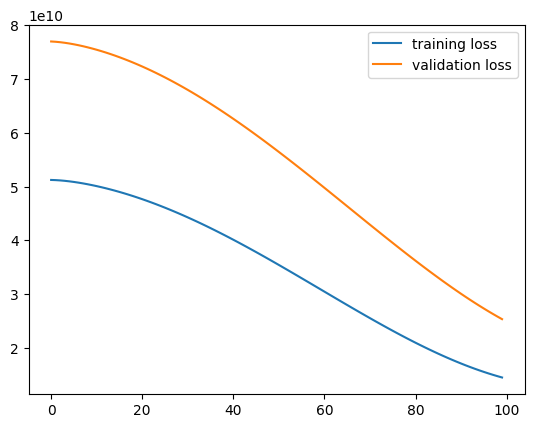

In [ ]:
plt.plot(range(len(history.history['loss'])), history.history['loss'], label='training loss')
plt.plot(range(len(history.history['loss'])), history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# Hyperparameter tuning
Many hyperparams(almost all) can be tuned using hyperparameter tuning with keras's tuner.

1. Number of layers
2. Input units per layer
3. Activation function per layer
4. Optimizer used

In [15]:
!pip install keras-tuner -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 3.1 MB/s eta 0:00:00


In [16]:
import numpy as np

def build_model(hp):
  model = Sequential()

  # input layer independent of hidden layer tuning, needs its own tuning
  # hp.Choice only allows for int, bool, str, float values,
  # valid strings for activation functions can be found in /usr/local/lib/python3.10/dist-packages/keras/src/activations.py
  model.add(Dense(hp.Choice('input_layer_units', list(range(20,50,4))), activation = hp.Choice('input_layer_activation', ['sigmoid', 'tanh', 'relu', 'selu', 'elu'])))

  for i in range(hp.Int('num_layers', min_value=1, max_value=5)): # loop to see how many hidden layers will be the best
    model.add(Dense(units=hp.Choice(f'hidden_layer_units_{i}', list(range(1,40,5))), activation=hp.Choice(f'hidden_layer_{i}_activation', ['sigmoid', 'tanh', 'relu', 'selu', 'elu']))) # lets keep it easy by fixing units and activation function

  model.add(Dense(units=1, activation='linear')) # final output layer

  optimizer = hp.Choice('optimizer',  values = ['adam', 'sgd', 'rmsprop', 'adagrad', 'adadelta'])

  model.compile(optimizer=optimizer, loss='mean_squared_error')
  return model

In [17]:
import keras_tuner
tuner = keras_tuner.RandomSearch(build_model, objective='val_loss', max_trials=3, overwrite=True)

In [18]:
tuner.search(X_train, y_train_tensor, epochs=50, validation_data = (X_test, y_test_tensor))

Trial 3 Complete [00h 02m 23s]
val_loss: 55164485632.0

Best val_loss So Far: 12791796736.0
Total elapsed time: 00h 07m 11s


## The following are the hyperparameter tuning results from a separate trial with the following features
1. max_trails=5
2. optimizer not being optimized using tuner.

In [ ]:
tuner.get_best_hyperparameters()[0].values

{'input_layer_units': 36,
 'input_layer_activation': 'tanh',
 'num_layers': 2,
 'hidden_layer_units_0': 21,
 'hidden_layer_0_activation': 'elu',
 'hidden_layer_units_1': 26,
 'hidden_layer_1_activation': 'relu'}

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 7
input_layer_units (Choice)
{'default': 20, 'conditions': [], 'values': [20, 24, 28, 32, 36, 40, 44, 48], 'ordered': True}
input_layer_activation (Choice)
{'default': 'sigmoid', 'conditions': [], 'values': ['sigmoid', 'tanh', 'relu', 'selu', 'elu'], 'ordered': False}
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 5, 'step': 1, 'sampling': 'linear'}
hidden_layer_units_0 (Choice)
{'default': 1, 'conditions': [], 'values': [1, 6, 11, 16, 21, 26, 31, 36], 'ordered': True}
hidden_layer_0_activation (Choice)
{'default': 'sigmoid', 'conditions': [], 'values': ['sigmoid', 'tanh', 'relu', 'selu', 'elu'], 'ordered': False}
hidden_layer_units_1 (Choice)
{'default': 1, 'conditions': [], 'values': [1, 6, 11, 16, 21, 26, 31, 36], 'ordered': True}
hidden_layer_1_activation (Choice)
{'default': 'sigmoid', 'conditions': [], 'values': ['sigmoid', 'tanh', 'relu', 'selu', 'elu'], 'ordered': False}


In [ ]:
best_model_tuned = tuner.get_best_models(num_models=1)[0]

best_model_history = best_model_tuned.fit(X_train, y_train_tensor, batch_size=64, epochs=200, validation_split=0.3)

Epoch 1/200
186/186 [==============================] - 2s 4ms/step - loss: 4236956928.0000 - val_loss: 4557864960.0000
Epoch 2/200
186/186 [==============================] - 1s 4ms/step - loss: 4232534528.0000 - val_loss: 4575815680.0000
Epoch 3/200
186/186 [==============================] - 1s 4ms/step - loss: 4224807424.0000 - val_loss: 4618444800.0000
Epoch 4/200
186/186 [==============================] - 1s 4ms/step - loss: 4222424064.0000 - val_loss: 4565198848.0000
Epoch 5/200
186/186 [==============================] - 1s 4ms/step - loss: 4219341568.0000 - val_loss: 4585075200.0000
Epoch 6/200
186/186 [==============================] - 1s 4ms/step - loss: 4217358848.0000 - val_loss: 4574475776.0000
Epoch 7/200
186/186 [==============================] - 1s 4ms/step - loss: 4214667520.0000 - val_loss: 4591159808.0000
Epoch 8/200
186/186 [==============================] - 1s 5ms/step - loss: 4210736384.0000 - val_loss: 4632835584.0000
Epoch 9/200
186/186 [===========================

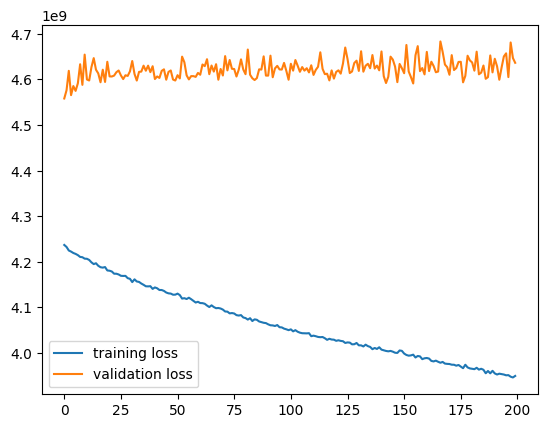

In [ ]:
plt.plot(range(len(best_model_history.history['loss'])), best_model_history.history['loss'], label='training loss')
plt.plot(range(len(best_model_history.history['loss'])), best_model_history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

This is obviously better than the model selected at the beginning (that had a loss of $2 \times 10^{10}$).

Clearly, overfitting has taken place, so its better to compile the model with an early stopping callback.

Even better if the callback could be used within a tuner.

## The following are the actual results of the recentmost trials
1. max_trials=3
2. optimizer is also tuned.

In [19]:
tuner.get_best_hyperparameters()[0].values

{'input_layer_units': 36,
 'input_layer_activation': 'relu',
 'num_layers': 2,
 'hidden_layer_units_0': 36,
 'hidden_layer_0_activation': 'sigmoid',
 'optimizer': 'sgd',
 'hidden_layer_units_1': 1,
 'hidden_layer_1_activation': 'sigmoid'}

In [20]:
tuner.search_space_summary()

Search space summary
Default search space size: 14
input_layer_units (Choice)
{'default': 20, 'conditions': [], 'values': [20, 24, 28, 32, 36, 40, 44, 48], 'ordered': True}
input_layer_activation (Choice)
{'default': 'sigmoid', 'conditions': [], 'values': ['sigmoid', 'tanh', 'relu', 'selu', 'elu'], 'ordered': False}
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 5, 'step': 1, 'sampling': 'linear'}
hidden_layer_units_0 (Choice)
{'default': 1, 'conditions': [], 'values': [1, 6, 11, 16, 21, 26, 31, 36], 'ordered': True}
hidden_layer_0_activation (Choice)
{'default': 'sigmoid', 'conditions': [], 'values': ['sigmoid', 'tanh', 'relu', 'selu', 'elu'], 'ordered': False}
optimizer (Choice)
{'default': 'adam', 'conditions': [], 'values': ['adam', 'sgd', 'rmsprop', 'adagrad', 'adadelta'], 'ordered': False}
hidden_layer_units_1 (Choice)
{'default': 1, 'conditions': [], 'values': [1, 6, 11, 16, 21, 26, 31, 36], 'ordered': True}
hidden_layer_1_activation (Choice)
{

In [21]:
best_model_tuned = tuner.get_best_models(num_models=1)[0]

best_model_history = best_model_tuned.fit(X_train, y_train_tensor, batch_size=64, epochs=200, validation_split=0.3)

Epoch 1/200
186/186 [==============================] - 2s 8ms/step - loss: 12556720128.0000 - val_loss: 15763624960.0000
Epoch 2/200
186/186 [==============================] - 1s 6ms/step - loss: 12549324800.0000 - val_loss: 15885026304.0000
Epoch 3/200
186/186 [==============================] - 1s 6ms/step - loss: 12548795392.0000 - val_loss: 15880674304.0000
Epoch 4/200
186/186 [==============================] - 1s 7ms/step - loss: 12548982784.0000 - val_loss: 15881441280.0000
Epoch 5/200
186/186 [==============================] - 1s 7ms/step - loss: 12548114432.0000 - val_loss: 15950367744.0000
Epoch 6/200
186/186 [==============================] - 1s 6ms/step - loss: 12546662400.0000 - val_loss: 15717058560.0000
Epoch 7/200
186/186 [==============================] - 1s 5ms/step - loss: 12549660672.0000 - val_loss: 15870454784.0000
Epoch 8/200
186/186 [==============================] - 1s 4ms/step - loss: 12548885504.0000 - val_loss: 15831908352.0000
Epoch 9/200
186/186 [===========

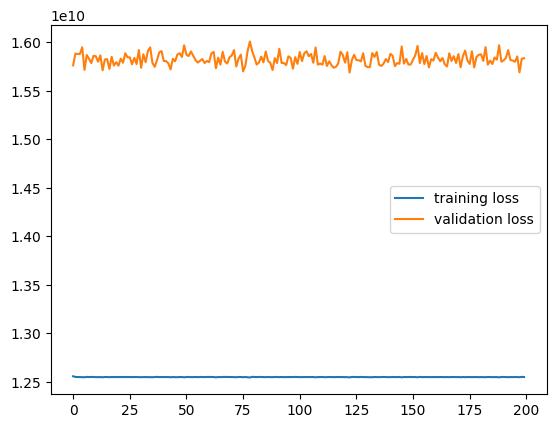

In [22]:
plt.plot(range(len(best_model_history.history['loss'])), best_model_history.history['loss'], label='training loss')
plt.plot(range(len(best_model_history.history['loss'])), best_model_history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()